In [11]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import matplotlib.pyplot as plt


In [12]:
noSuggestions = 0
suggestionsOnly = 0
autoFilled = 0

autoFilled1 = 0
autoFilled3 = 0
autoFilled5 = 0

suggestionsOnly1 = 0
suggestionsOnly3 = 0
suggestionsOnly5 = 0


totalTasks = 0

for root, dirs, files in os.walk("./complete/clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                
                try:
                    data = json.load(json_file)
                    
                    if(data['suggestionsConfig'] == 'show'):
                        if(data['autoFilledSuggestion'] == 0):
                            suggestionsOnly = suggestionsOnly + 1
                            
                            if(data['suggestionsNumber'] == 1):
                                suggestionsOnly1 = suggestionsOnly1 + 1
                            
                            elif(data['suggestionsNumber'] == 3):
                                suggestionsOnly3 = suggestionsOnly3 + 1
                            
                            else:
                               suggestionsOnly5 = suggestionsOnly5 + 1 
                        
                        
                        
                        else:
                            autoFilled = autoFilled + 1
                            
                            if(data['suggestionsNumber'] == 1):
                                autoFilled1 = autoFilled1 + 1
                            
                            elif(data['suggestionsNumber'] == 3):
                                autoFilled3 = autoFilled3 + 1
                            
                            else:
                                autoFilled5 = autoFilled5 + 1 
                    
                    
                    else:
                        noSuggestions = noSuggestions + 1 
                
                
                    totalTasks = totalTasks + 1
                    
                    
                    
                except Exception as e: print(e)

# Distribution of tasks per setting

102


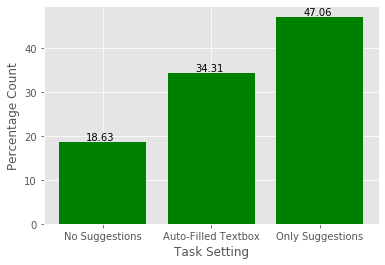

In [13]:
print(totalTasks)

%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
counts = [noSuggestions, autoFilled, suggestionsOnly]

newCounts = [round((x / totalTasks)*100, 2) for x in counts]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Percentage Count")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
    
plt.show()


# Distribution of tasks per setting (Detailed)

102


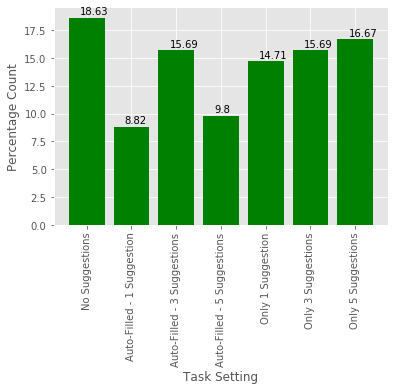

In [14]:
print(totalTasks)

%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled - 1 Suggestion', 'Auto-Filled - 3 Suggestions', 'Auto-Filled - 5 Suggestions',
    'Only 1 Suggestion', 'Only 3 Suggestions', 'Only 5 Suggestions']
counts = [noSuggestions, autoFilled1, autoFilled3, autoFilled5, suggestionsOnly1, suggestionsOnly3, suggestionsOnly5]

newCounts = [round((x / totalTasks)*100, 2) for x in counts]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Percentage Count")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
plt.xticks(rotation=90)    
plt.show()

In [15]:
totalTasks = 0


noSuggestions = 0
suggestionsOnly = 0
autoFilled = 0

autoFilled1 = 0
autoFilled3 = 0
autoFilled5 = 0

suggestionsOnly1 = 0
suggestionsOnly3 = 0
suggestionsOnly5 = 0


noSuggestionsTime = 0
suggestionsOnlyTime = 0
autoFilledTime = 0

autoFilled1Time = 0
autoFilled3Time = 0
autoFilled5Time = 0

suggestionsOnly1Time = 0
suggestionsOnly3Time = 0
suggestionsOnly5Time = 0





for root, dirs, files in os.walk("./complete/clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
           
            with open(fileName) as json_file:
                
                try:
                    data = json.load(json_file)
                    
                    currentDialogs = data['dialogs']
                    
                    for i in range(1, len(currentDialogs)):
                    
                        dialogEntry = currentDialogs[i]
                        
                        
                        if(data['suggestionsConfig'] == 'show'):
                            if(data['autoFilledSuggestion'] == 0):
                                suggestionsOnly = suggestionsOnly + 1
                                suggestionsOnlyTime = suggestionsOnlyTime + dialogEntry['timeTaken']
                                
                                
                                if(data['suggestionsNumber'] == 1):
                                    suggestionsOnly1 = suggestionsOnly1 + 1
                                    suggestionsOnly1Time = suggestionsOnly1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    suggestionsOnly3 = suggestionsOnly3 + 1
                                    suggestionsOnly3Time = suggestionsOnly3Time + dialogEntry['timeTaken']

                                else:
                                    suggestionsOnly5 = suggestionsOnly5 + 1
                                    suggestionsOnly5Time = suggestionsOnly5Time + dialogEntry['timeTaken']
                                


                            else:
                                autoFilled = autoFilled + 1
                                autoFilledTime = autoFilledTime + dialogEntry['timeTaken']
                                if(data['suggestionsNumber'] == 1):
                                    autoFilled1 = autoFilled1 + 1
                                    autoFilled1Time = autoFilled1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    autoFilled3 = autoFilled3 + 1
                                    autoFilled3Time = autoFilled3Time + dialogEntry['timeTaken']

                                else:
                                    autoFilled5 = autoFilled5 + 1 
                                    autoFilled5Time = autoFilled5Time + dialogEntry['timeTaken']


                        else:
                            noSuggestions = noSuggestions + 1
                            noSuggestionsTime = noSuggestionsTime + dialogEntry['timeTaken']
                
                
                    totalTasks = totalTasks + 1
                    
                    
                    
                except Exception as e: print(e)

# Average time taken (in s) per dialog


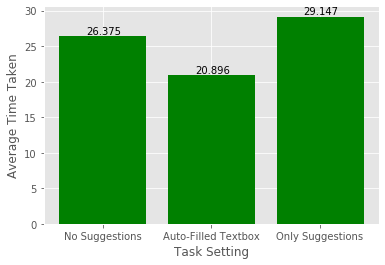

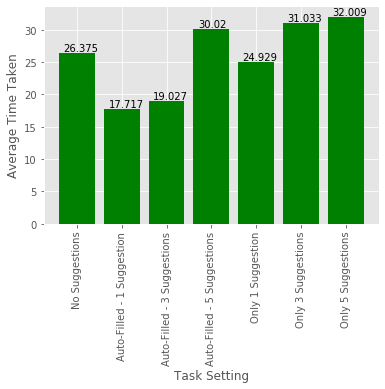

In [16]:
%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
counts = [noSuggestions, autoFilled, suggestionsOnly]
timeCounts = [noSuggestionsTime, autoFilledTime, suggestionsOnlyTime]

newCounts = []
for i in range(len(counts)):
    avgTime = round((timeCounts[i]/counts[i]), 3)
    newCounts.append(avgTime)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Average Time Taken")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
    
plt.show()


%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled - 1 Suggestion', 'Auto-Filled - 3 Suggestions', 'Auto-Filled - 5 Suggestions',
    'Only 1 Suggestion', 'Only 3 Suggestions', 'Only 5 Suggestions']
counts = [noSuggestions, autoFilled1, autoFilled3, autoFilled5, suggestionsOnly1, suggestionsOnly3, 
          suggestionsOnly5]
timeCounts = [noSuggestionsTime, autoFilled1Time, autoFilled3Time, autoFilled5Time, 
              suggestionsOnly1Time, suggestionsOnly3Time, suggestionsOnly5Time]


newCounts = []
for i in range(len(counts)):
    avgTime = round((timeCounts[i]/counts[i]), 3)
    newCounts.append(avgTime)
    
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Average Time Taken")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.30, v + 0.3 , str(v))
plt.xticks(rotation=90)    
plt.show()

# Number of dialogs per setting


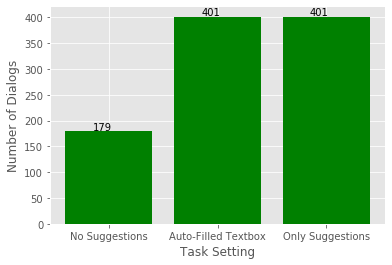

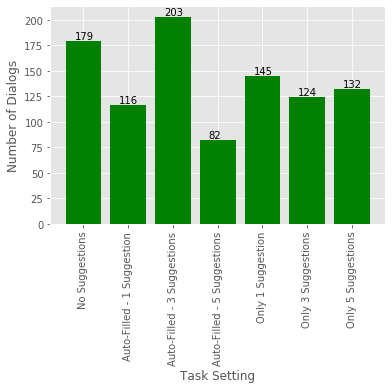

In [17]:

%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
newCounts = [noSuggestions, autoFilled, suggestionsOnly]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 2.3 , str(v))
    
plt.show()



%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled - 1 Suggestion', 'Auto-Filled - 3 Suggestions', 'Auto-Filled - 5 Suggestions',
    'Only 1 Suggestion', 'Only 3 Suggestions', 'Only 5 Suggestions']
newCounts = [noSuggestions, autoFilled1, autoFilled3, autoFilled5, suggestionsOnly1, suggestionsOnly3, 
          suggestionsOnly5]




    
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.20, v + 1.9 , str(v))
plt.xticks(rotation=90)    
plt.show()

# Trends when suggestions are **NOT** viewed


In [18]:
totalTasks = 0


noSuggestions = 0
suggestionsOnly = 0
autoFilled = 0

autoFilled1 = 0
autoFilled3 = 0
autoFilled5 = 0

suggestionsOnly1 = 0
suggestionsOnly3 = 0
suggestionsOnly5 = 0


noSuggestionsTime = 0
suggestionsOnlyTime = 0
autoFilledTime = 0

autoFilled1Time = 0
autoFilled3Time = 0
autoFilled5Time = 0

suggestionsOnly1Time = 0
suggestionsOnly3Time = 0
suggestionsOnly5Time = 0





for root, dirs, files in os.walk("./complete/clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
           
            with open(fileName) as json_file:
                
                try:
                    data = json.load(json_file)
                    
                    currentDialogs = data['dialogs']
                    
                    for i in range(1, len(currentDialogs)):
                    
                        dialogEntry = currentDialogs[i]
                        
                        if(dialogEntry['suggestionsViewed']):
                            continue
                        
                        if(data['suggestionsConfig'] == 'show'):
                            if(data['autoFilledSuggestion'] == 0):
                                suggestionsOnly = suggestionsOnly + 1
                                suggestionsOnlyTime = suggestionsOnlyTime + dialogEntry['timeTaken']
                                
                                
                                if(data['suggestionsNumber'] == 1):
                                    suggestionsOnly1 = suggestionsOnly1 + 1
                                    suggestionsOnly1Time = suggestionsOnly1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    suggestionsOnly3 = suggestionsOnly3 + 1
                                    suggestionsOnly3Time = suggestionsOnly3Time + dialogEntry['timeTaken']

                                else:
                                    suggestionsOnly5 = suggestionsOnly5 + 1
                                    suggestionsOnly5Time = suggestionsOnly5Time + dialogEntry['timeTaken']
                                


                            else:
                                autoFilled = autoFilled + 1
                                autoFilledTime = autoFilledTime + dialogEntry['timeTaken']
                                if(data['suggestionsNumber'] == 1):
                                    autoFilled1 = autoFilled1 + 1
                                    autoFilled1Time = autoFilled1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    autoFilled3 = autoFilled3 + 1
                                    autoFilled3Time = autoFilled3Time + dialogEntry['timeTaken']

                                else:
                                    autoFilled5 = autoFilled5 + 1 
                                    autoFilled5Time = autoFilled5Time + dialogEntry['timeTaken']


                        else:
                            noSuggestions = noSuggestions + 1
                            noSuggestionsTime = noSuggestionsTime + dialogEntry['timeTaken']
                
                
                    totalTasks = totalTasks + 1
                    
                    
                    
                except Exception as e: print(e)

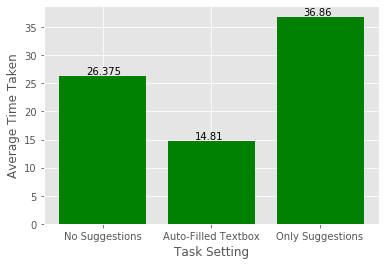

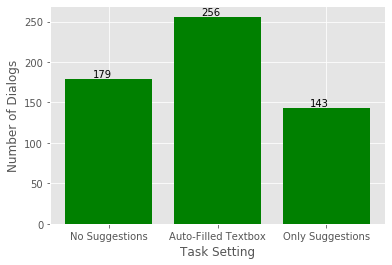

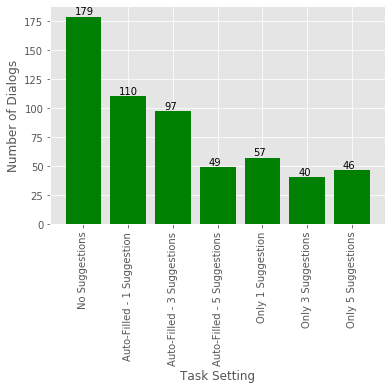

In [19]:

%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
counts = [noSuggestions, autoFilled, suggestionsOnly]
timeCounts = [noSuggestionsTime, autoFilledTime, suggestionsOnlyTime]

newCounts = []
for i in range(len(counts)):
    avgTime = round((timeCounts[i]/counts[i]), 3)
    newCounts.append(avgTime)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Average Time Taken")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
    
plt.show()


%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
newCounts = [noSuggestions, autoFilled, suggestionsOnly]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 2.3 , str(v))
    
plt.show()



%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled - 1 Suggestion', 'Auto-Filled - 3 Suggestions', 'Auto-Filled - 5 Suggestions',
    'Only 1 Suggestion', 'Only 3 Suggestions', 'Only 5 Suggestions']
newCounts = [noSuggestions, autoFilled1, autoFilled3, autoFilled5, suggestionsOnly1, suggestionsOnly3, 
          suggestionsOnly5]




    
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.20, v + 1.9 , str(v))
plt.xticks(rotation=90)    
plt.show()

In [20]:
totalTasks = 0


noSuggestions = 0
suggestionsOnly = 0
autoFilled = 0

autoFilled1 = 0
autoFilled3 = 0
autoFilled5 = 0

suggestionsOnly1 = 0
suggestionsOnly3 = 0
suggestionsOnly5 = 0


noSuggestionsTime = 0
suggestionsOnlyTime = 0
autoFilledTime = 0

autoFilled1Time = 0
autoFilled3Time = 0
autoFilled5Time = 0

suggestionsOnly1Time = 0
suggestionsOnly3Time = 0
suggestionsOnly5Time = 0





for root, dirs, files in os.walk("./complete/clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
           
            with open(fileName) as json_file:
                
                try:
                    data = json.load(json_file)
                    
                    currentDialogs = data['dialogs']
                    
                    for i in range(1, len(currentDialogs)):
                    
                        dialogEntry = currentDialogs[i]
                        
                        if(not dialogEntry['suggestionsViewed']):
                            continue
                        
                        if(data['suggestionsConfig'] == 'show'):
                            if(data['autoFilledSuggestion'] == 0):
                                suggestionsOnly = suggestionsOnly + 1
                                suggestionsOnlyTime = suggestionsOnlyTime + dialogEntry['timeTaken']
                                
                                
                                if(data['suggestionsNumber'] == 1):
                                    suggestionsOnly1 = suggestionsOnly1 + 1
                                    suggestionsOnly1Time = suggestionsOnly1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    suggestionsOnly3 = suggestionsOnly3 + 1
                                    suggestionsOnly3Time = suggestionsOnly3Time + dialogEntry['timeTaken']

                                else:
                                    suggestionsOnly5 = suggestionsOnly5 + 1
                                    suggestionsOnly5Time = suggestionsOnly5Time + dialogEntry['timeTaken']
                                


                            else:
                                autoFilled = autoFilled + 1
                                autoFilledTime = autoFilledTime + dialogEntry['timeTaken']
                                if(data['suggestionsNumber'] == 1):
                                    autoFilled1 = autoFilled1 + 1
                                    autoFilled1Time = autoFilled1Time + dialogEntry['timeTaken']

                                elif(data['suggestionsNumber'] == 3):
                                    autoFilled3 = autoFilled3 + 1
                                    autoFilled3Time = autoFilled3Time + dialogEntry['timeTaken']

                                else:
                                    autoFilled5 = autoFilled5 + 1 
                                    autoFilled5Time = autoFilled5Time + dialogEntry['timeTaken']


                        else:
                            noSuggestions = noSuggestions + 1
                            noSuggestionsTime = noSuggestionsTime + dialogEntry['timeTaken']
                
                
                    totalTasks = totalTasks + 1
                    
                    
                    
                except Exception as e: print(e)

# Trends when suggestions are viewed


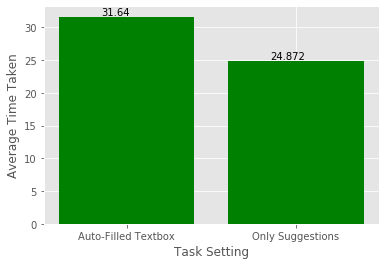

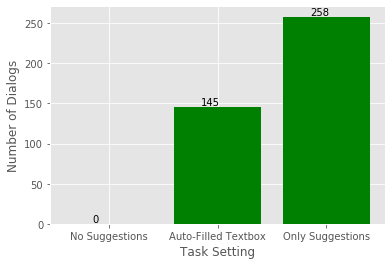

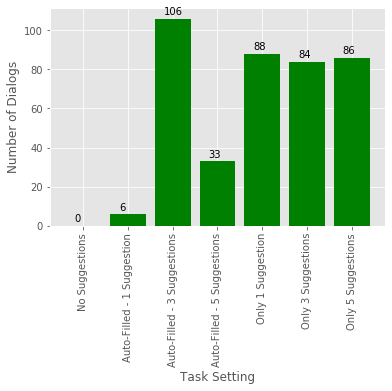

In [21]:

%matplotlib inline
plt.style.use('ggplot')

x = ['Auto-Filled Textbox', 'Only Suggestions']
counts = [autoFilled, suggestionsOnly]
timeCounts = [autoFilledTime, suggestionsOnlyTime]

newCounts = []
for i in range(len(counts)):
    avgTime = round((timeCounts[i]/counts[i]), 3)
    newCounts.append(avgTime)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Average Time Taken")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
    
plt.show()


%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled Textbox', 'Only Suggestions']
newCounts = [noSuggestions, autoFilled, suggestionsOnly]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.15, v + 2.3 , str(v))
    
plt.show()



%matplotlib inline
plt.style.use('ggplot')

x = ['No Suggestions', 'Auto-Filled - 1 Suggestion', 'Auto-Filled - 3 Suggestions', 'Auto-Filled - 5 Suggestions',
    'Only 1 Suggestion', 'Only 3 Suggestions', 'Only 5 Suggestions']
newCounts = [noSuggestions, autoFilled1, autoFilled3, autoFilled5, suggestionsOnly1, suggestionsOnly3, 
          suggestionsOnly5]




    
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, newCounts, color='green')
plt.xlabel("Task Setting")
plt.ylabel("Number of Dialogs")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(newCounts):
    plt.text(x_pos[i] - 0.20, v + 1.9 , str(v))
plt.xticks(rotation=90)    
plt.show()